--Abdelrahman Mahmoud Shoukry--211002045-- Nile University--

This project is about the prediction of kidney disease by using 7 models and a dataset containing 43 columns (features) and 20.5k rows
and it includes both categorical and numerical data, and the ‘Target’ column denotes the presence or classification of kidney disease 
The 'Target' column contains 5 classes that would be predicted in this notebook 
Also, I do an application by using the top two models to make it easy for users to make their prediction through an app using Streamlit
This notebook is detailed in every cell with the code

--I made this project based on three questions--
--first -> whether the models I use can predict the disease with high accuracy with the 5 classes in the target?
--Second-> What are the most important features that significantly affect kidney disease classification?
--third -> How can I make a diagnostic tool accessible and useful to non-technical users through an interactive Streamlit application?

In [48]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

In [49]:
# read the dataset
df = pd.read_csv('kidney_disease.csv')

In [50]:
# print the first 10 rows as summrizing 
df.head(10)

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167.0,1.023,1.0,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127.0,1.023,3.0,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148.0,1.016,0.0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98.0,1.017,4.0,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174.0,1.015,1.0,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease
5,14,92.0,1.006,4.0,2,abnormal,abnormal,not present,present,371,...,yes,23.7,moderate,26,12,2.81,normal,2.33,2.98,No_Disease
6,9,156.0,1.010,2.0,0,abnormal,normal,not present,not present,255,...,no,19.7,moderate,5,14,1.90,abnormal,7.31,7.00,No_Disease
7,67,100.0,1.010,5.0,3,normal,normal,present,present,260,...,yes,37.2,moderate,15,1,0.86,abnormal,7.86,12.95,No_Disease
8,42,138.0,1.017,4.0,4,abnormal,normal,present,present,352,...,yes,23.5,moderate,18,5,2.24,abnormal,5.93,10.13,No_Disease
9,23,127.0,1.020,2.0,4,abnormal,abnormal,not present,present,196,...,yes,31.4,low,23,30,1.42,abnormal,3.82,6.87,No_Disease


In [51]:
#Report the number of missing values per feature and Visualize class distribution
#identify dataset types
print(df.info())
df.describe()
# detect missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20532 non-null  float64
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20530 non-null  float64
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20534 non-null  object 
 6   Pus cells in urine                           20535 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [52]:
#handle missing data using mean
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
print(df.head())
#trying to drop missing data
df = df.dropna()
# Verify missing values are handled
print(df.isnull().sum())

   Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  54                   167.0                      1.023   
1                  42                   127.0                      1.023   
2                  38                   148.0                      1.016   
3                   7                    98.0                      1.017   
4                  67                   174.0                      1.015   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0               1.0               4                   normal   
1               3.0               2                   normal   
2               0.0               0                 abnormal   
3               4.0               0                 abnormal   
4               1.0               1                   normal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  \
0           abnormal              not present       not present   
1             normal    

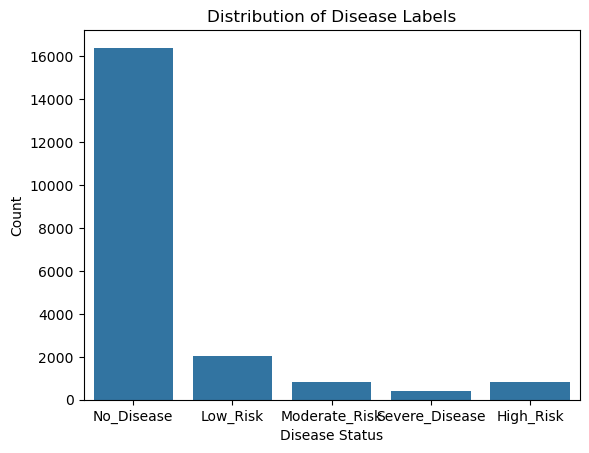

In [53]:
#Visualize class distribution using seaborn.countplot.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=df)
plt.title('Distribution of Disease Labels')
plt.xlabel('Disease Status')
plt.ylabel('Count')
plt.show()

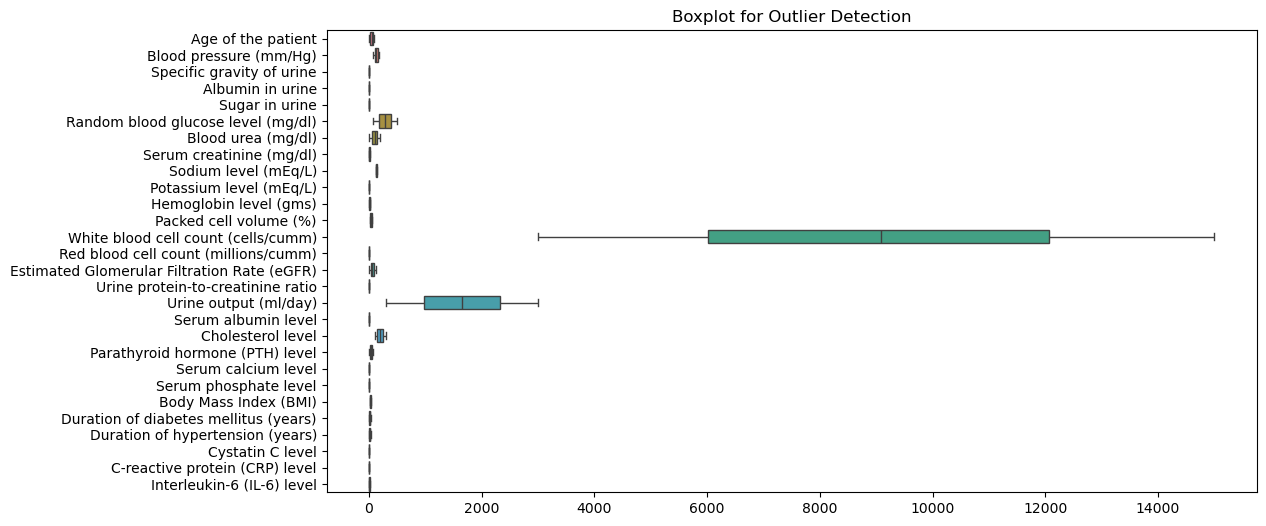

In [54]:
# Outlier detection with visualizing
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

In [55]:
#outlier detection
# Compute Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['number']))
# Identify outliers
outliers = (abs(z_scores) > 2).any(axis=1)
#remove outliers
df_cleaned = df[~outliers]
print(df_cleaned)
print("Original size:", df.shape, "After outlier removal:", df_cleaned.shape)

       Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                      54                   167.0                      1.023   
1                      42                   127.0                      1.023   
2                      38                   148.0                      1.016   
3                       7                    98.0                      1.017   
4                      67                   174.0                      1.015   
...                   ...                     ...                        ...   
20533                  86                   113.0                      1.008   
20534                  47                    80.0                      1.016   
20535                  89                   178.0                      1.011   
20536                  86                   138.0                      1.009   
20537                  63                   120.0                      1.015   

       Albumin in urine  Sugar in urine

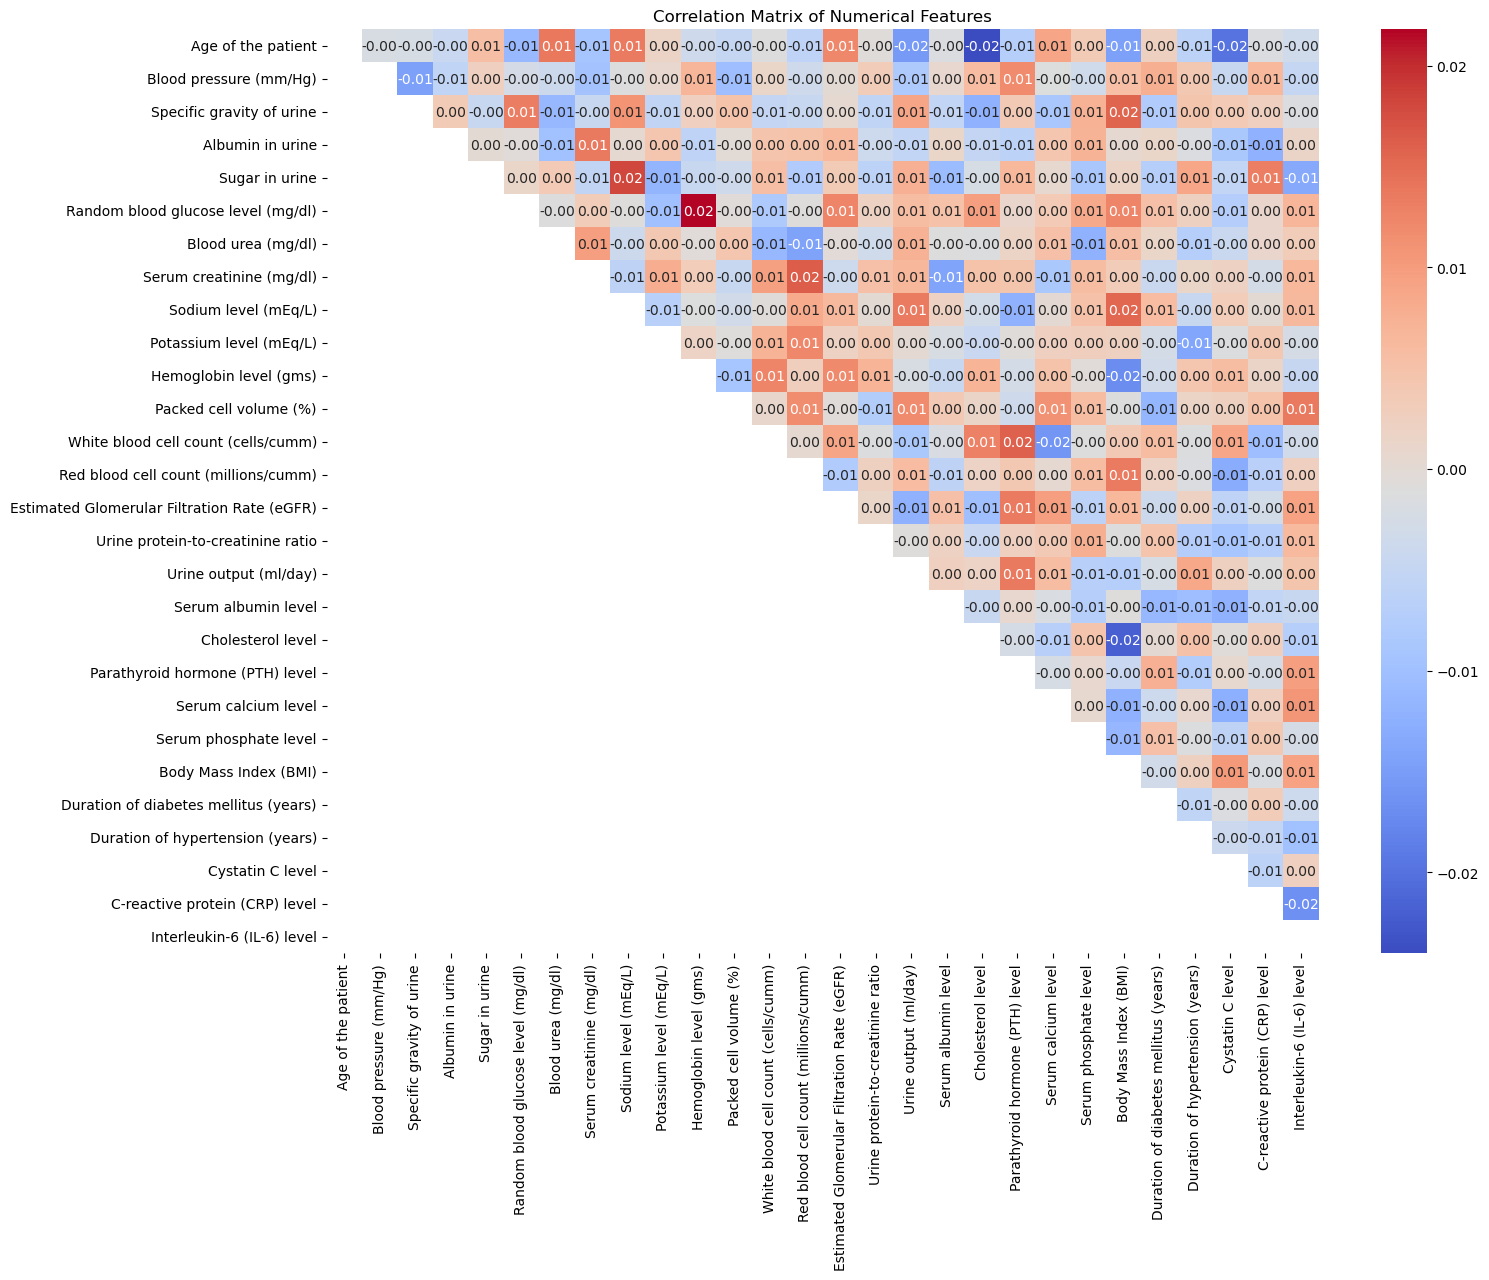

In [56]:
# Compute the correlation matrix for numerical features
# Select numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()
correlation_matrix = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


This is a Feature Correlation Matrix — it shows the Pearson correlation coefficients between all pairs of features in your dataset.
Values range from -1 to +1:

+1 → Perfect positive correlation

0 → No correlation

-1 → Perfect negative correlation

In [57]:
#Encode Categorical Features
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [58]:
# Print mapping of label -> encoded number
label_mapping = {label: idx for idx, label in enumerate(label_encoders['Target'].classes_)}
print(label_mapping)

{'High_Risk': 0, 'Low_Risk': 1, 'Moderate_Risk': 2, 'No_Disease': 3, 'Severe_Disease': 4}


In [59]:
# splitting into train and test
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [60]:
#top features selection
from sklearn.feature_selection import SelectKBest, f_classif

# Ensure all columns are numeric
X_train = X_train.select_dtypes(include=['number'])

# Apply feature selection
selector = SelectKBest(score_func=f_classif, k=min(5, X_train.shape[1]))  # Avoid selecting more features than available
X_selected = selector.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]

print("Selected Features:", list(selected_features))

Selected Features: ['Sugar in urine', 'Pus cells in urine', 'White blood cell count (cells/cumm)', 'Appetite (good/poor)', 'Serum albumin level']


In [61]:
# Apply StandardScaler
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# Apply SMOTE Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
# Check class distribution after balancing
from collections import Counter
print("After SMOTE:", Counter(y_train))

After SMOTE: Counter({3: 11485, 0: 11485, 1: 11485, 2: 11485, 4: 11485})


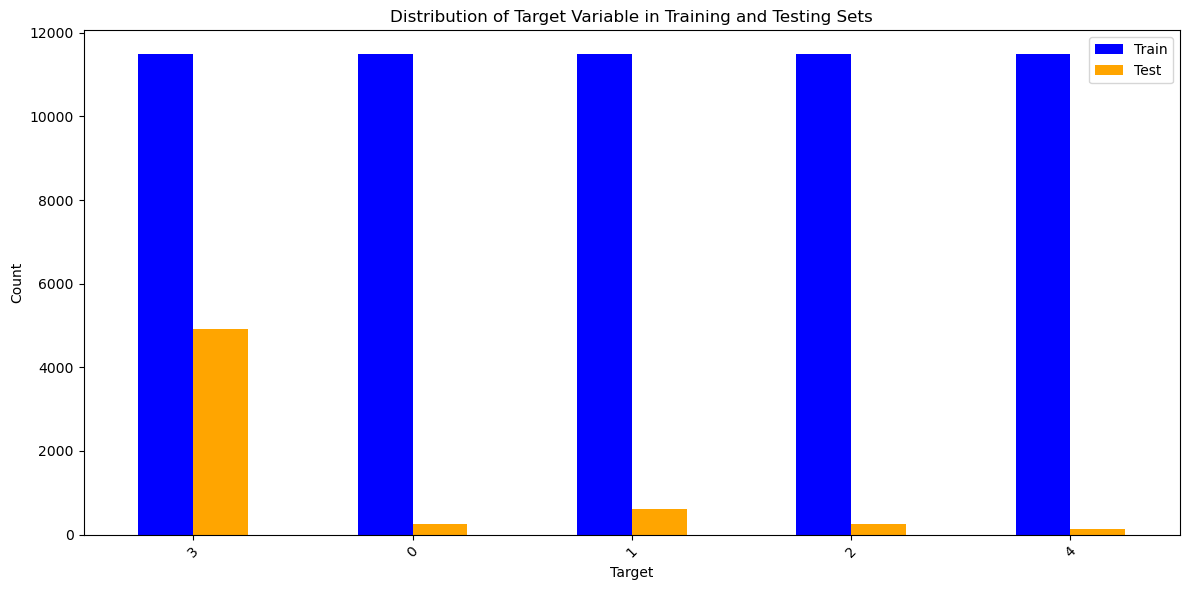

In [63]:
# Check the distribution of the target variable in the training and testing sets
# Combine the training and testing target distributions into a single DataFrame
train_counts = y_train.value_counts().rename("Train")
test_counts = y_test.value_counts().rename("Test")
combined_counts = pd.concat([train_counts, test_counts], axis=1)
# Plot the distributions side by side
combined_counts.plot(kind="bar", figsize=(12, 6), color=["blue", "orange"])
plt.title("Distribution of Target Variable in Training and Testing Sets")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend(["Train", "Test"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
### ----- model 1 Regression model-----###
# Initialize Logistic Regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

D:\University\Bioinformatics tools\Anaconda machine L\installer\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
# Predictions on the test set
y_pred_lr = model.predict(X_test)

In [66]:
# Calculate accuracy. Confusion matrix and  Classification report
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.14
Confusion Matrix:
[[  39   52   64   24   67]
 [ 109  117  166   76  148]
 [  36   40   63   35   72]
 [ 736 1047 1250  606 1284]
 [  16   26   30   17   34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.16      0.07       246
           1       0.09      0.19      0.12       616
           2       0.04      0.26      0.07       246
           3       0.80      0.12      0.21      4923
           4       0.02      0.28      0.04       123

    accuracy                           0.14      6154
   macro avg       0.20      0.20      0.10      6154
weighted avg       0.65      0.14      0.19      6154



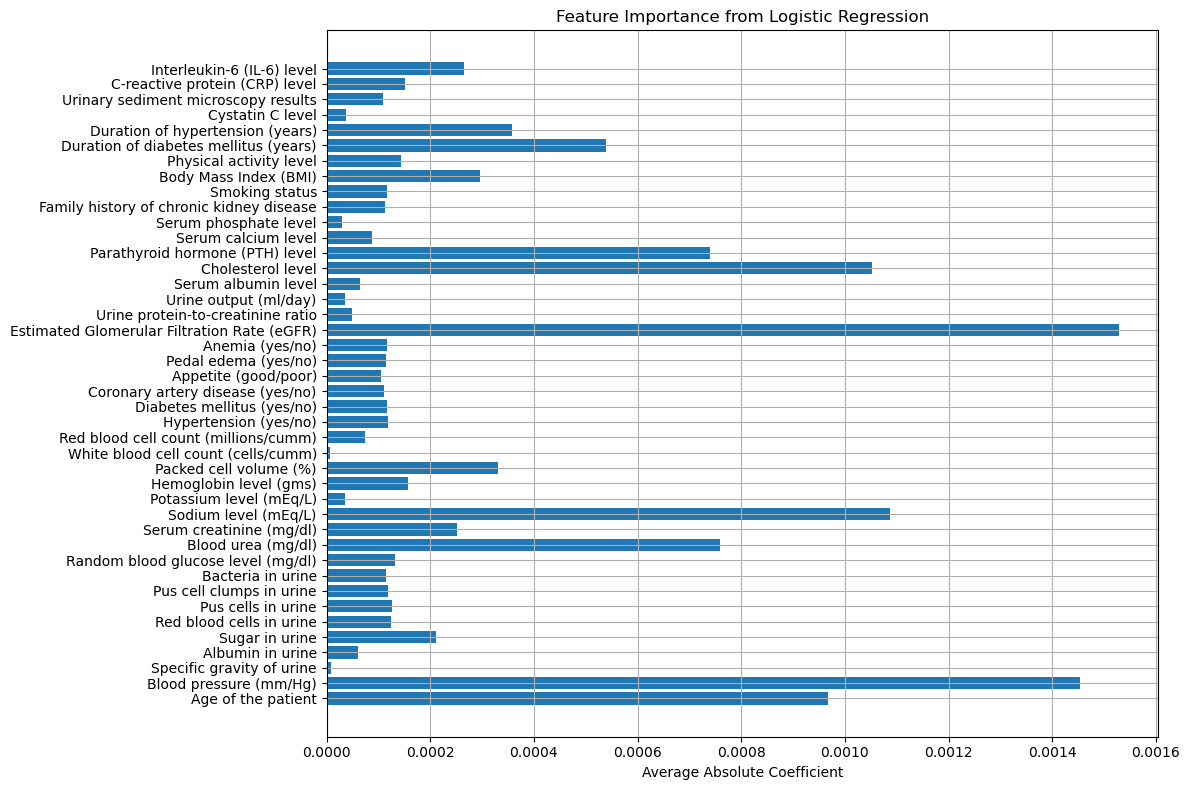

In [67]:
# Assuming model is a trained LogisticRegression model and X_train is a DataFrame
feature_names = X_train.columns
coefficients = model.coef_
# For multiclass, coef_ will be shape (n_classes, n_features)
importance = np.mean(np.abs(coefficients), axis=0)
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importance)
plt.xlabel("Average Absolute Coefficient")
plt.title("Feature Importance from Logistic Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

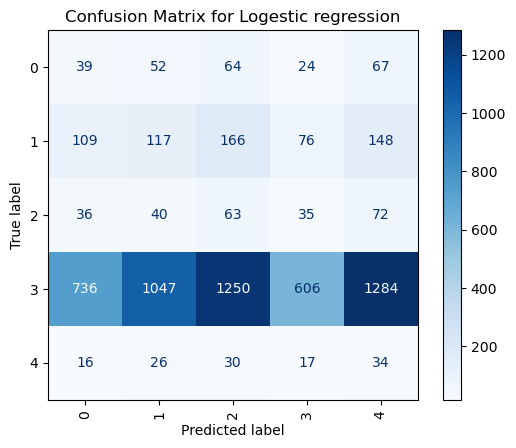

In [68]:
# Plot confusion matrix
# Replace these with your actual class labels (the unique values in y_test)
class_labels = sorted(list(set(y_test) | set(y_pred_lr)))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lr,
    display_labels=class_labels,
    cmap='Blues',
    xticks_rotation=90
)
plt.title("Confusion Matrix for Logestic regression")
plt.show()

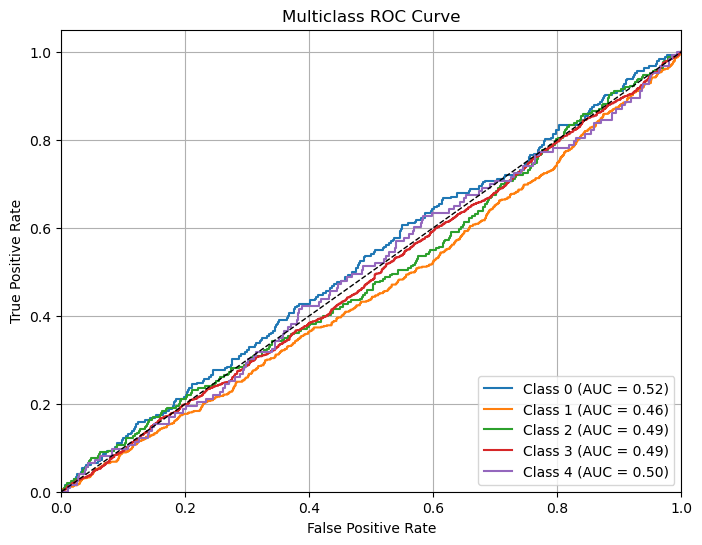

In [69]:
#Re-binarize target labels correctly using the original y_test
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Make sure y_test and y are from same source
n_classes = y_test_bin.shape[1]
# Get predicted probabilities from the model
y_score = model.predict_proba(X_test) 
# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [70]:
### ----- model 2 KNN-----###
# Initialize KNN with K=7
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [71]:
# Predict on test data
y_pred_knn = knn.predict(X_test)

In [72]:
# Calculate accuracy. Confusion matrix and  Classification report
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.24
Confusion Matrix:
[[  49   68   37   51   41]
 [ 114  169  100  146   87]
 [  44   66   40   62   34]
 [ 921 1215  794 1197  796]
 [  21   38   25   23   16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.20      0.07       246
           1       0.11      0.27      0.16       616
           2       0.04      0.16      0.06       246
           3       0.81      0.24      0.37      4923
           4       0.02      0.13      0.03       123

    accuracy                           0.24      6154
   macro avg       0.20      0.20      0.14      6154
weighted avg       0.66      0.24      0.32      6154



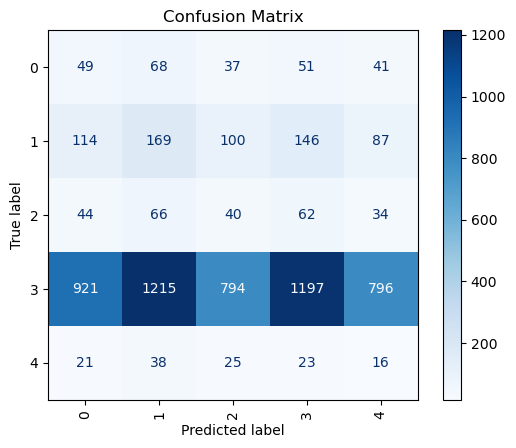

In [73]:
# Replace these with your actual class labels (the unique values in y_test)
class_labels = sorted(list(set(y_test) | set(y_pred_knn)))
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_knn,
    display_labels=class_labels,
    cmap='Blues',
    xticks_rotation=90
)
plt.title("Confusion Matrix")
plt.show()

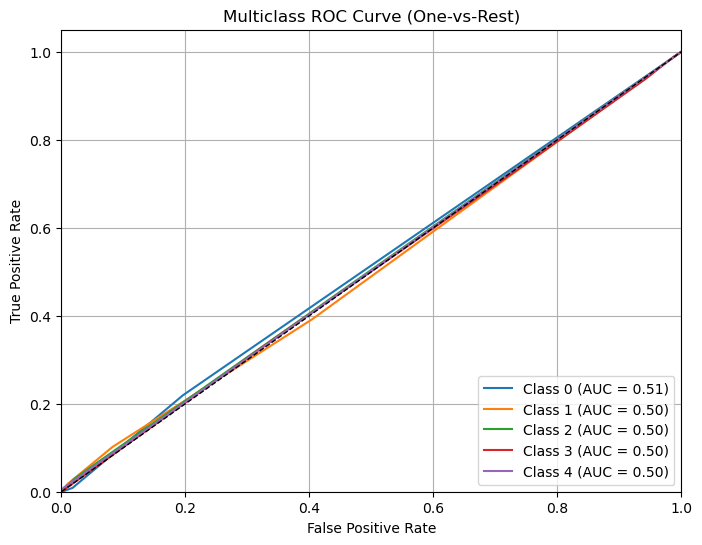

In [74]:
from sklearn.multiclass import OneVsRestClassifier
#Binarize the target
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

#Split the data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train One-vs-Rest classifier
classifier = OneVsRestClassifier(KNeighborsClassifier())
classifier.fit(X_train, y_train_bin)
y_score = classifier.predict_proba(X_test)

#Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#  Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [75]:
### ----- model 3 Naive bayes-----###
# Initialize and train the Naive Bayes model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [76]:
# Predict on test data
y_pred_nb = nb.predict(X_test)

In [77]:
# Calculate accuracy. Confusion matrix and  Classification report
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, zero_division=0))

Accuracy: 0.80
Confusion Matrix:
[[   0    0    0  167    0]
 [   0    0    0  411    0]
 [   0    0    0  144    0]
 [   0    0    0 3297    0]
 [   0    0    0   84    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       167
           1       0.00      0.00      0.00       411
           2       0.00      0.00      0.00       144
           3       0.80      1.00      0.89      3297
           4       0.00      0.00      0.00        84

    accuracy                           0.80      4103
   macro avg       0.16      0.20      0.18      4103
weighted avg       0.65      0.80      0.72      4103



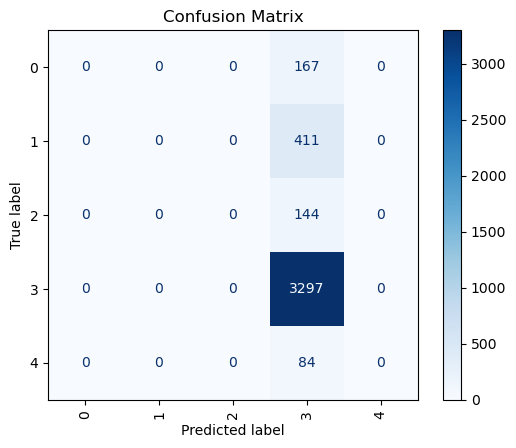

In [78]:
# Replace these with your actual class labels (the unique values in y_test)
class_labels = sorted(list(set(y_test) | set(y_pred_nb)))
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_nb,
    display_labels=class_labels,
    cmap='Blues',
    xticks_rotation=90
)
plt.title("Confusion Matrix")
plt.show()

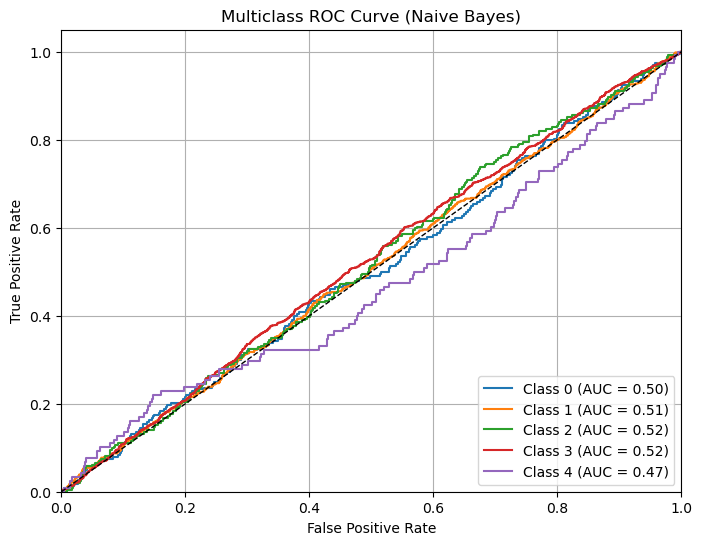

In [79]:
# Split the data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train One-vs-Rest classifier using GaussianNB
classifier = OneVsRestClassifier(GaussianNB())
classifier.fit(X_train, y_train_bin)
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Naive Bayes)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [80]:
### ----- model 4 Random Forest-----###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, VotingClassifier
)
results = {}
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results['Random Forest'] = accuracy_score(y_test, rf.predict(X_test))
print(results)

{'Random Forest': 0.8053298667533312}


In [81]:
#Evaluate the model. Calculate accuracy. Confusion matrix and  Classification report
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Accuracy: 0.81
Confusion Matrix:
[[   0    0    0  228    0]
 [   0    0    0  608    0]
 [   0    0    0  244    0]
 [   0    0    0 4956    0]
 [   0    0    0  118    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.00      0.00      0.00       608
           2       0.00      0.00      0.00       244
           3       0.81      1.00      0.89      4956
           4       0.00      0.00      0.00       118

    accuracy                           0.81      6154
   macro avg       0.16      0.20      0.18      6154
weighted avg       0.65      0.81      0.72      6154



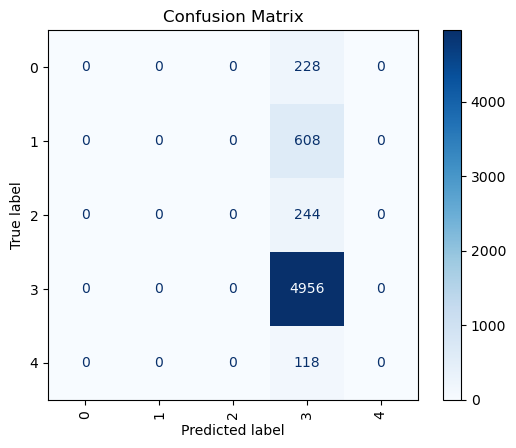

In [82]:
# Replace these with your actual class labels (the unique values in y_test)
class_labels = sorted(list(set(y_test) | set(y_pred_rf)))
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    display_labels=class_labels,
    cmap='Blues',
    xticks_rotation=90
)
plt.title("Confusion Matrix")
plt.show()

In [83]:
### ----- model 5 XGBoost-----### 
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [84]:
#Evaluate the model. Calculate accuracy. Confusion matrix and  Classification report
xgb_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, xgb_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))
print("Classification Report:")
print(classification_report(y_test, xgb_pred, zero_division=0))

Accuracy: 0.80
Confusion Matrix:
[[   0    0    0  228    0]
 [   0    0    0  608    0]
 [   0    0    0  244    0]
 [   0    3    1 4952    0]
 [   0    0    0  118    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.00      0.00      0.00       608
           2       0.00      0.00      0.00       244
           3       0.81      1.00      0.89      4956
           4       0.00      0.00      0.00       118

    accuracy                           0.80      6154
   macro avg       0.16      0.20      0.18      6154
weighted avg       0.65      0.80      0.72      6154



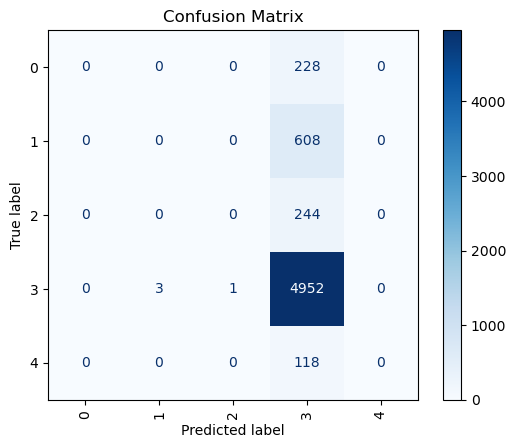

In [85]:
# Replace these with your actual class labels (the unique values in y_test)
class_labels = sorted(list(set(y_test) | set(xgb_pred)))
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    xgb_pred,
    display_labels=class_labels,
    cmap='Blues',
    xticks_rotation=90
)
plt.title("Confusion Matrix")
plt.show()

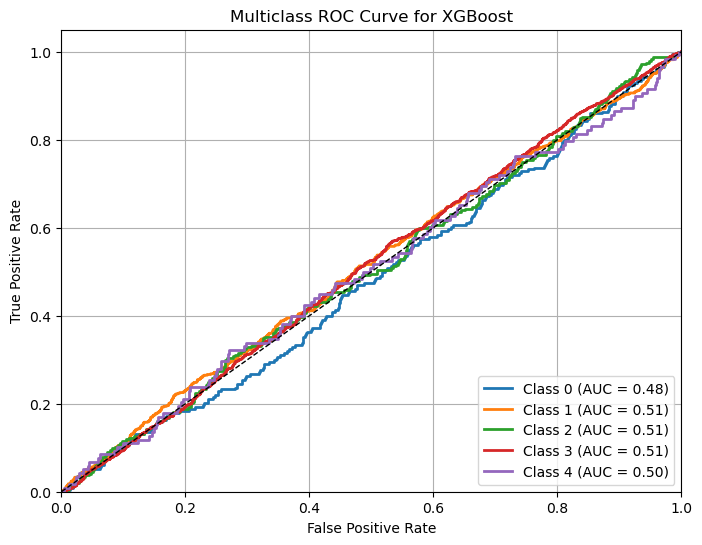

In [86]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_score = xgb_model.predict_proba(X_test)

#Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot all ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [87]:
### ----- model 6 Adaboost-----### 
ab = AdaBoostClassifier(n_estimators=50, random_state=42)
ab.fit(X_train, y_train)
results['AdaBoost'] = accuracy_score(y_test, ab.predict(X_test))
print(results)

D:\University\Bioinformatics tools\Anaconda machine L\installer\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Random Forest': 0.8053298667533312, 'AdaBoost': 0.8051673708157296}


In [88]:
 #Evaluate the model. Calculate accuracy. Confusion matrix and  Classification report
ab_pred = ab.predict(X_test)
accuracy = accuracy_score(y_test, ab_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, ab_pred))
print("Classification Report:")
print(classification_report(y_test, ab_pred, zero_division=0))

Accuracy: 0.81
Confusion Matrix:
[[   0    0    0  228    0]
 [   0    0    0  608    0]
 [   0    0    0  244    0]
 [   0    0    1 4955    0]
 [   0    0    0  118    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.00      0.00      0.00       608
           2       0.00      0.00      0.00       244
           3       0.81      1.00      0.89      4956
           4       0.00      0.00      0.00       118

    accuracy                           0.81      6154
   macro avg       0.16      0.20      0.18      6154
weighted avg       0.65      0.81      0.72      6154



In [89]:
### ----- model 7 voting models-----### 
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    
    'XGBoost': XGBClassifier(
        objective='multi:softprob',     
        eval_metric='mlogloss',
        random_state=42
    ),
    
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        algorithm='SAMME',             
        random_state=42
    )
}
voting = VotingClassifier(estimators=[
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost']),
    ('adb', models['AdaBoost'])
], voting='hard')

models['Voting Ensemble'] = voting


 Classification Report: Voting Ensemble
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.00      0.00      0.00       608
           2       0.00      0.00      0.00       244
           3       0.81      1.00      0.89      4956
           4       0.00      0.00      0.00       118

    accuracy                           0.81      6154
   macro avg       0.16      0.20      0.18      6154
weighted avg       0.65      0.81      0.72      6154



D:\University\Bioinformatics tools\Anaconda machine L\installer\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\University\Bioinformatics tools\Anaconda machine L\installer\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\University\Bioinformatics tools\Anaconda machine L\installer\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

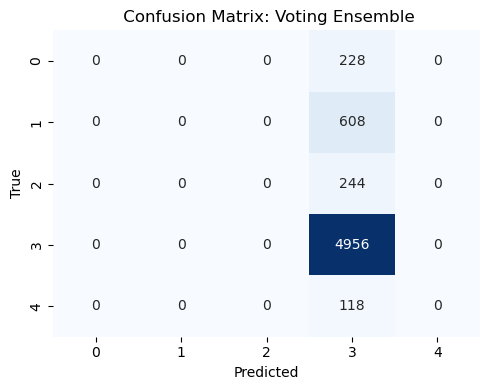

In [90]:
#Define individual models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(
        objective='multi:softprob',      
        eval_metric='mlogloss',
        random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        algorithm='SAMME',              
        random_state=42
    )
}
#Voting Ensemble (hard voting)
voting = VotingClassifier(estimators=[
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost']),
    ('adb', models['AdaBoost'])
], voting='hard')

models['Voting Ensemble'] = voting

#Fit and evaluate Voting Ensemble
model = models['Voting Ensemble']
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Report
print("\n Classification Report: Voting Ensemble")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(' Confusion Matrix: Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [91]:
### ---- summary accuracies for all the models ----###
# Define models 
models = {
    'Logistic Regression': LogisticRegression(random_state=537, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=537),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=537),
    'AdaBoost': AdaBoostClassifier(random_state=537, algorithm='SAMME')
}
voting = VotingClassifier(estimators=[
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost']),
    ('adb', models['AdaBoost'])
], voting='hard')
models['Voting Ensemble'] = voting
# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name}: Accuracy = {accuracy:.4f}')

Logistic Regression: Accuracy = 0.8053
K-Nearest Neighbors: Accuracy = 0.7717
Gaussian Naive Bayes: Accuracy = 0.8053
Random Forest: Accuracy = 0.8053
XGBoost: Accuracy = 0.8047
AdaBoost: Accuracy = 0.8052
Voting Ensemble: Accuracy = 0.8053


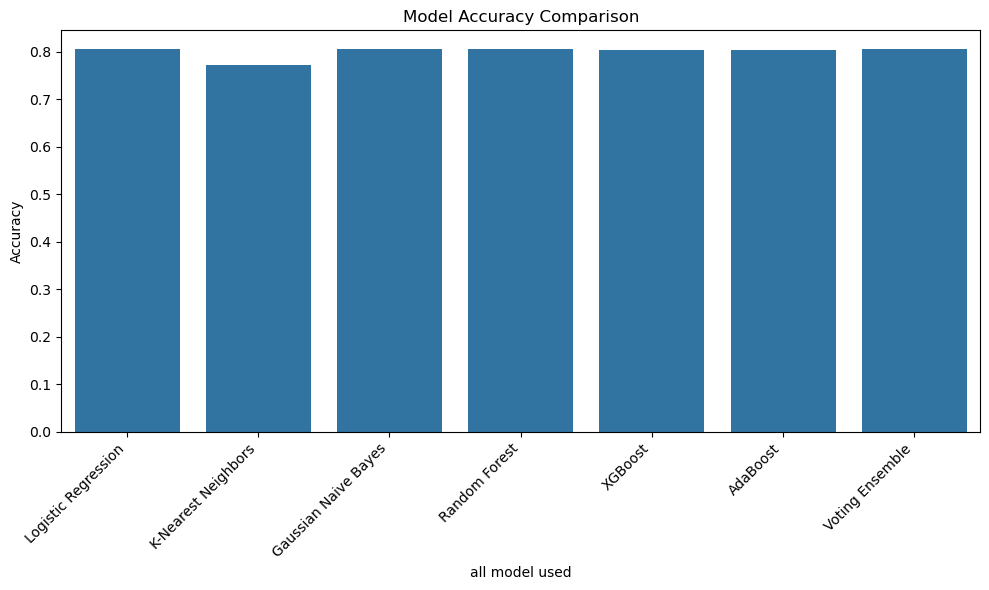

In [92]:
### --- model accuracy comparison  --- ###
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('all model used')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 Evaluation Summary:
                  Model  Accuracy  Precision    Recall  F1-score
0   Logistic Regression  0.805330   0.648556  0.805330  0.718491
1   K-Nearest Neighbors  0.771693   0.664541  0.771693  0.710219
2  Gaussian Naive Bayes  0.805330   0.648556  0.805330  0.718491
3         Random Forest  0.805330   0.648556  0.805330  0.718491
4               XGBoost  0.804680   0.648454  0.804680  0.718169
5              AdaBoost  0.805167   0.648531  0.805167  0.718410
6       Voting Ensemble  0.805330   0.648556  0.805330  0.718491


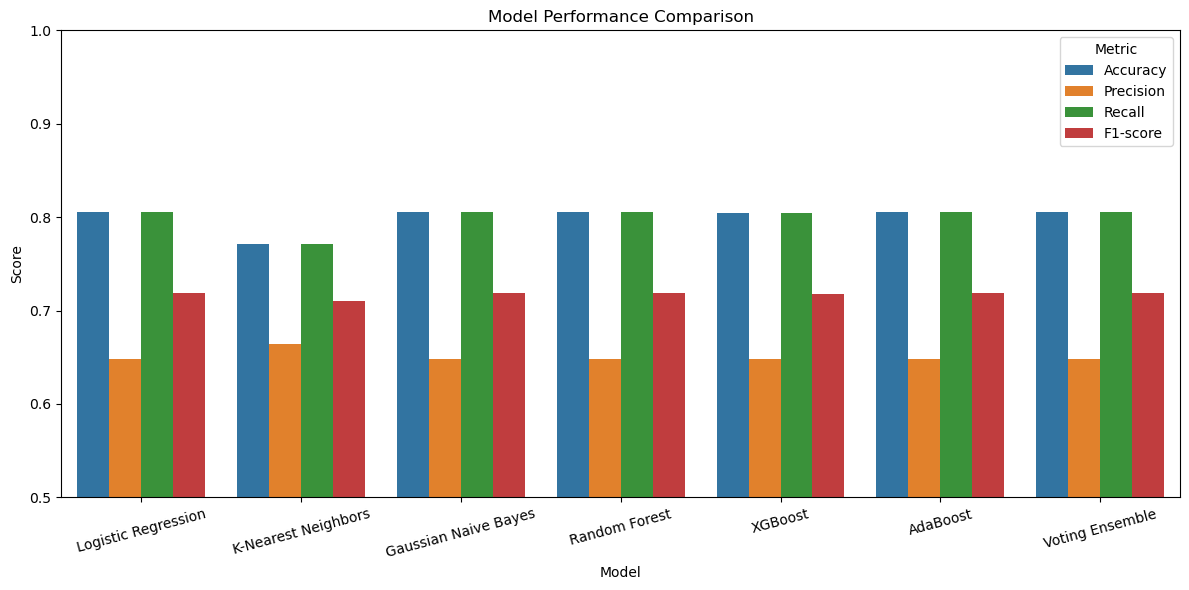

In [93]:
###------  summary for all models  ------###
#Collect metrics
summary = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score']
    })

# summary DataFrame
df_summary = pd.DataFrame(summary)
print("\n Evaluation Summary:")
print(df_summary)

# 4. Barplot of metrics
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_summary.melt(id_vars='Model', var_name='Metric', value_name='Score'),
    x='Model', y='Score', hue='Metric'
)
plt.title('Model Performance Comparison')
plt.xticks(rotation=15)
plt.ylim(0.5, 1)
plt.tight_layout()
plt.show()

After running the notebook, most of the models were good in the range of accuracy 80% with a good precision,recall and F1-score; this scores means values in the models. Accuracy -> How often the model is right overall. Useful when classes are balanced, but can be misleading if data is imbalanced.Precision-> Out of all the times the model predicted positive, how many were actually positive. Recall->Out of all actual positive cases, how many the model correctly caught.F1-Score-> Best used when you want a balance between precision and recall, especially in imbalanced datasets.

by showing confusion matrix and ROC and AUC curves, the curves show insignificant and bad results.It measures the overall ability of the model to rank predictions correctly. results = 1.0: Perfect model,if = 0.5: No discrimination or results > 0.8: Usually considered good. but most of them show less than 0.7 

-The models were able to predict the kidney disease with good accuracy, with the 5 classes in the target and i choose (Random Forest  0.805330) and (Gaussian Naive Bayes  0.805330) that have the highest accuracies to make the application using streamlit

-I was able to found out the most important features that significantly affect kidney disease classification which are
('Sugar in urine', 'Pus cells in urine', 'White blood cell count (cells/cumm)', 'Appetite (good/poor)', 'Serum albumin level')